In [1]:
import pandas as pd 
import ibm_db
from sqlalchemy.engine import create_engine

In [2]:
%load_ext sql

In [3]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# https://www.coursera.org/learn/sql-data-science/ungradedWidget/hcm5I/lab-create-database-credentials
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa

%sql ibm_db_sa://username:password@hostname:port/BLUDB?security=SSL

In [4]:
%%sql 

select * from INTERNATIONAL_STUDENT_TEST_SCORES limit 5

 * ibm_db_sa://xdb40270:***@3883e7e4-18f5-4afe-be8c-fa31c41761d2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31498/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46


In [5]:
#using python variables in SQL statements

country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://xdb40270:***@3883e7e4-18f5-4afe-be8c-fa31c41761d2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31498/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [7]:
#Assigning the Results of Queries to Python Variables

test_score_distribution = %sql SELECT test_score, count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://xdb40270:***@3883e7e4-18f5-4afe-be8c-fa31c41761d2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31498/BLUDB
Done.


test_score,frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


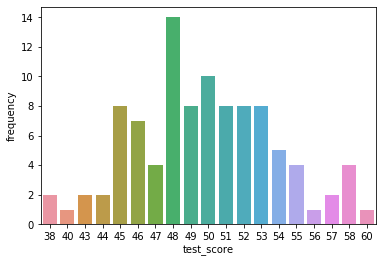

In [12]:
dataframe = test_score_distribution.DataFrame() #convert to df

%matplotlib inline
import seaborn

plot = seaborn.barplot(x='test_score',y='frequency', data=dataframe)